In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:

df = sns.load_dataset('titanic')



In [3]:
df = df[['survived', 'sex', 'age', 'fare', 'class', 'embarked', 'sibsp', 'parch']]
df = df.dropna()



In [4]:

le = LabelEncoder()
for col in ['sex', 'class', 'embarked']:
    df[col] = le.fit_transform(df[col])



In [5]:
X = df.drop('survived', axis=1)
y = df['survived']


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [7]:

model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7640449438202247
[[92 14]
 [28 44]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       106
           1       0.76      0.61      0.68        72

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.75       178
weighted avg       0.76      0.76      0.76       178



In [9]:

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated Accuracy:", np.mean(cv_scores))



Cross-validated Accuracy: 0.8006303555599331


In [10]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)


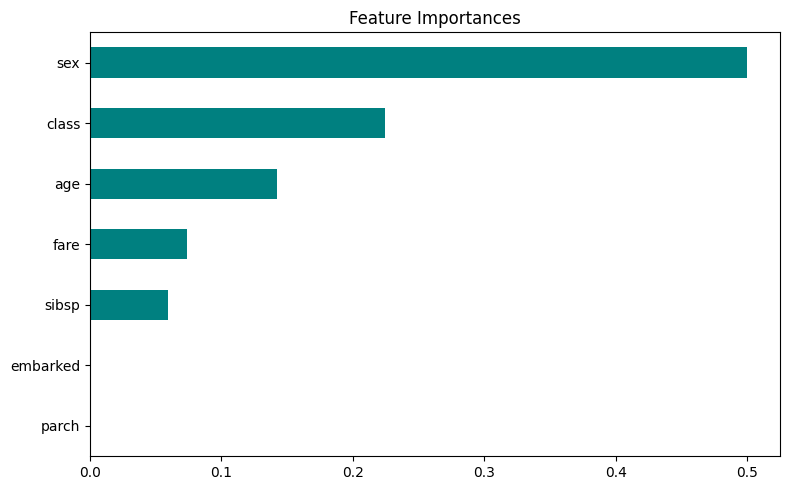

In [11]:

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='teal')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


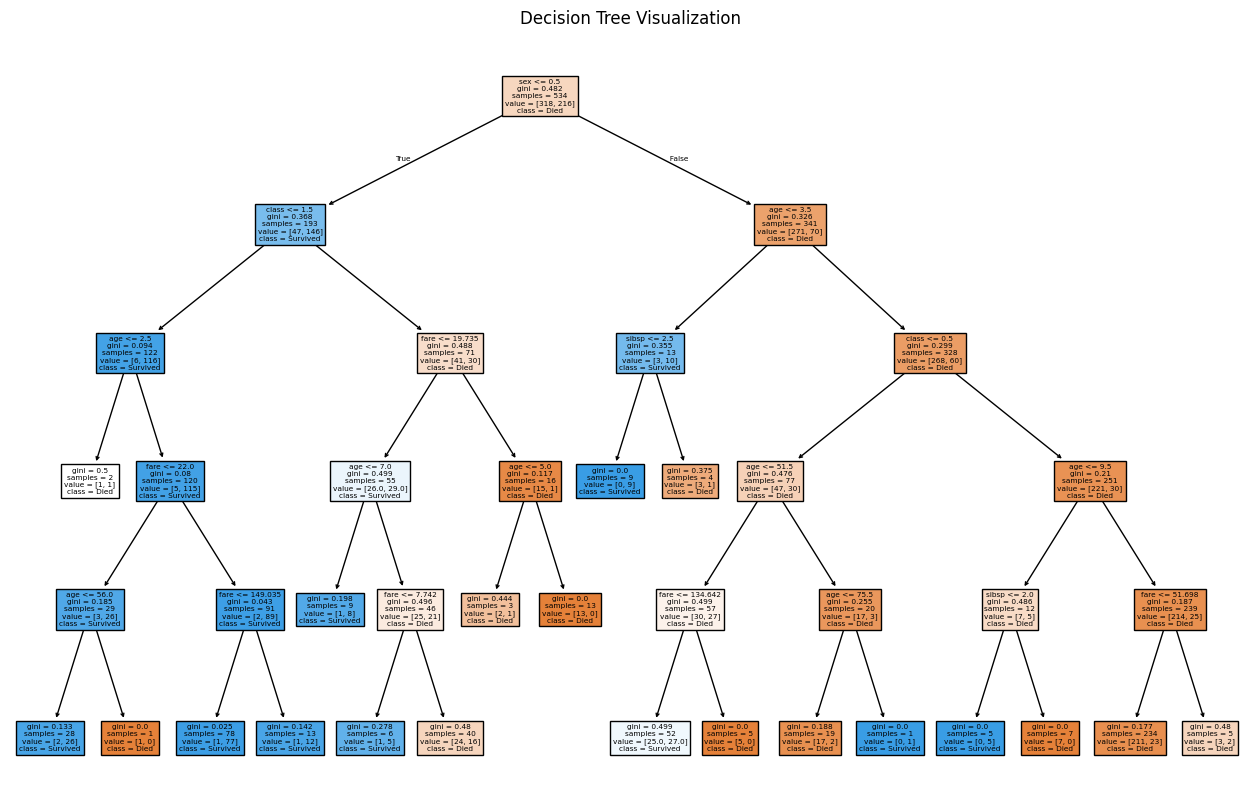

In [12]:

plt.figure(figsize=(16,10))
plot_tree(model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()